# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

!pip install beautifulsoup4

In [39]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [40]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [41]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | BA 246 21JAN 2023 Did not a...
1,✅ Trip Verified | Not a great experience. I co...
2,Not Verified | I was excited to fly BA as I'd ...
3,Not Verified | I just want to warn everyone o...
4,Not Verified | Paid for business class travell...


# Cleaning the text

In [42]:
import re

def clean(text):
# Removing all the special characters and numerical values
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,✅ Trip Verified | BA 246 21JAN 2023 Did not a...,Trip Verified BA JAN Did not appreciate the u...
1,✅ Trip Verified | Not a great experience. I co...,Trip Verified Not a great experience I could ...
2,Not Verified | I was excited to fly BA as I'd ...,Not Verified I was excited to fly BA as I d no...
3,Not Verified | I just want to warn everyone o...,Not Verified I just want to warn everyone of t...
4,Not Verified | Paid for business class travell...,Not Verified Paid for business class travellin...


In [43]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [44]:
df.head()

,reviews,Cleaned Reviews
0,✅ Trip Verified | BA 246 21JAN 2023 Did not a...,Trip Verified BA JAN Did not appreciate the u...
1,✅ Trip Verified | Not a great experience. I co...,Trip Verified Not a great experience I could ...
2,Not Verified | I was excited to fly BA as I'd ...,Not Verified I was excited to fly BA as I d no...
3,Not Verified | I just want to warn everyone o...,Not Verified I just want to warn everyone of t...
4,Not Verified | Paid for business class travell...,Not Verified Paid for business class travellin...


In [45]:
df.shape

(1000, 2)

In [46]:
df

,reviews,Cleaned Reviews
0,✅ Trip Verified | BA 246 21JAN 2023 Did not a...,Trip Verified BA JAN Did not appreciate the u...
1,✅ Trip Verified | Not a great experience. I co...,Trip Verified Not a great experience I could ...
2,Not Verified | I was excited to fly BA as I'd ...,Not Verified I was excited to fly BA as I d no...
3,Not Verified | I just want to warn everyone o...,Not Verified I just want to warn everyone of t...
4,Not Verified | Paid for business class travell...,Not Verified Paid for business class travellin...
...,...,...
995,✅ Trip Verified | Miami to Tel Aviv via Londo...,Trip Verified Miami to Tel Aviv via London At...
996,✅ Trip Verified | London to Seoul. I normally...,Trip Verified London to Seoul I normally fly ...
997,✅ Trip Verified | London Heathrow to New York...,Trip Verified London Heathrow to New York JFK...
998,✅ Trip Verified | San Diego to London. From th...,Trip Verified San Diego to London From the mo...


In [47]:
df.duplicated().sum()

0

# Tokenization

In [48]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SHILPA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHILPA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SHILPA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [49]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))

    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))

    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\SHILPA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\SHILPA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,✅ Trip Verified | BA 246 21JAN 2023 Did not a...,Trip Verified BA JAN Did not appreciate the u...,"[(Trip, n), (Verified, n), (BA, n), (JAN, n), ..."
1,✅ Trip Verified | Not a great experience. I co...,Trip Verified Not a great experience I could ...,"[(Trip, n), (Verified, n), (great, a), (experi..."
2,Not Verified | I was excited to fly BA as I'd ...,Not Verified I was excited to fly BA as I d no...,"[(Verified, n), (excited, v), (fly, v), (BA, n..."
3,Not Verified | I just want to warn everyone o...,Not Verified I just want to warn everyone of t...,"[(Verified, n), (want, v), (warn, v), (everyon..."
4,Not Verified | Paid for business class travell...,Not Verified Paid for business class travellin...,"[(Verified, n), (Paid, n), (business, n), (cla..."


In [50]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,✅ Trip Verified | BA 246 21JAN 2023 Did not a...,Trip Verified BA JAN Did not appreciate the u...,"[(Trip, n), (Verified, n), (BA, n), (JAN, n), ...",Trip Verified BA JAN appreciate unprofession...
1,✅ Trip Verified | Not a great experience. I co...,Trip Verified Not a great experience I could ...,"[(Trip, n), (Verified, n), (great, a), (experi...",Trip Verified great experience could check o...
2,Not Verified | I was excited to fly BA as I'd ...,Not Verified I was excited to fly BA as I d no...,"[(Verified, n), (excited, v), (fly, v), (BA, n...",Verified excite fly BA travel long haul yr t...
3,Not Verified | I just want to warn everyone o...,Not Verified I just want to warn everyone of t...,"[(Verified, n), (want, v), (warn, v), (everyon...",Verified want warn everyone bad customer ser...
4,Not Verified | Paid for business class travell...,Not Verified Paid for business class travellin...,"[(Verified, n), (Paid, n), (business, n), (cla...",Verified Paid business class travel Cairo Lo...


In [51]:
df[['reviews','Lemma']]


,reviews,Lemma
0,✅ Trip Verified | BA 246 21JAN 2023 Did not a...,Trip Verified BA JAN appreciate unprofession...
1,✅ Trip Verified | Not a great experience. I co...,Trip Verified great experience could check o...
2,Not Verified | I was excited to fly BA as I'd ...,Verified excite fly BA travel long haul yr t...
3,Not Verified | I just want to warn everyone o...,Verified want warn everyone bad customer ser...
4,Not Verified | Paid for business class travell...,Verified Paid business class travel Cairo Lo...
...,...,...
995,✅ Trip Verified | Miami to Tel Aviv via Londo...,Trip Verified Miami Tel Aviv via London Miam...
996,✅ Trip Verified | London to Seoul. I normally...,Trip Verified London Seoul normally fly busi...
997,✅ Trip Verified | London Heathrow to New York...,Trip Verified London Heathrow New York JFK B...
998,✅ Trip Verified | San Diego to London. From th...,Trip Verified San Diego London moment board ...


# Sentiment Analysis using VADER


In [55]:
!pip install vaderSentiment


In [56]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
    
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()


,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,✅ Trip Verified | BA 246 21JAN 2023 Did not a...,Trip Verified BA JAN Did not appreciate the u...,"[(Trip, n), (Verified, n), (BA, n), (JAN, n), ...",Trip Verified BA JAN appreciate unprofession...,0.2960,Neutral
1,✅ Trip Verified | Not a great experience. I co...,Trip Verified Not a great experience I could ...,"[(Trip, n), (Verified, n), (great, a), (experi...",Trip Verified great experience could check o...,0.9538,Positive
2,Not Verified | I was excited to fly BA as I'd ...,Not Verified I was excited to fly BA as I d no...,"[(Verified, n), (excited, v), (fly, v), (BA, n...",Verified excite fly BA travel long haul yr t...,0.7506,Positive
3,Not Verified | I just want to warn everyone o...,Not Verified I just want to warn everyone of t...,"[(Verified, n), (want, v), (warn, v), (everyon...",Verified want warn everyone bad customer ser...,0.6318,Positive
4,Not Verified | Paid for business class travell...,Not Verified Paid for business class travellin...,"[(Verified, n), (Paid, n), (business, n), (cla...",Verified Paid business class travel Cairo Lo...,-0.2182,Negative


In [57]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    480
Negative    413
Neutral     107
Name: Analysis, dtype: int64

# Data Visualization



([<matplotlib.patches.Wedge at 0x1e266a62740>,
 [Text(0.0690696084852792, 1.0978293989430645, 'Positive'),
  Text(-0.42732892910126147, -1.0136024794529506, 'Negative'),
  Text(1.2744424129677328, -0.4453049921446907, 'Neutral')],
 [Text(0.03767433190106138, 0.598816035787126, '48.0%'),
  Text(-0.2330885067825062, -0.5528740797016094, '41.3%'),
  Text(0.802426704461165, -0.2803772172762867, '10.7%')])

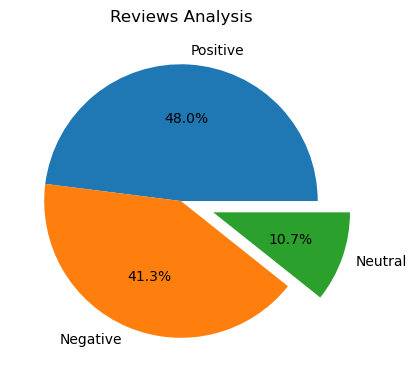

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [59]:
df.to_csv("BA_reviews.csv")


# Wordcloud

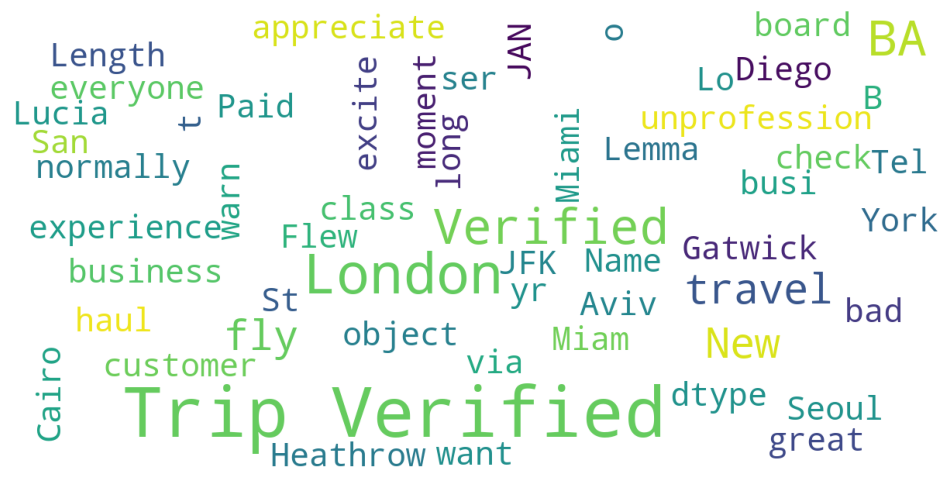

In [60]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)

Summary:
In this project, web scraping was employed to gather reviews related to British Airways from the Skytrax website using Python and BeautifulSoup. The code navigated through paginated pages, collecting a total of 1000 reviews. The dataset was then cleaned by removing unnecessary information, such as special characters and numerical values, resulting in a cleaned dataset with two columns: 'reviews' and 'Cleaned Reviews'. The text data was further processed through tokenization, part-of-speech tagging, and lemmatization to enhance the analysis.

The sentiment analysis was conducted using the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool. The sentiment scores were categorized into positive, negative, or neutral sentiments, and the results were visualized through pie charts, demonstrating the distribution of sentiments in the reviews. The majority of reviews were classified as positive (48%), followed by negative (41.3%), and a smaller portion as neutral (10.7%).

Additionally, a word cloud was generated to visually represent the most frequently occurring words in the cleaned and lemmatized text, providing a qualitative insight into the prominent themes within the reviews.

Overall, this project showcases a comprehensive workflow, encompassing web scraping, data cleaning, text processing, sentiment analysis, and visualization. The resulting dataset and insights can be further utilized for in-depth analysis or integrated into broader airline performance evaluations.